In [1]:
from matplotlib import pyplot as plt
import numpy as np

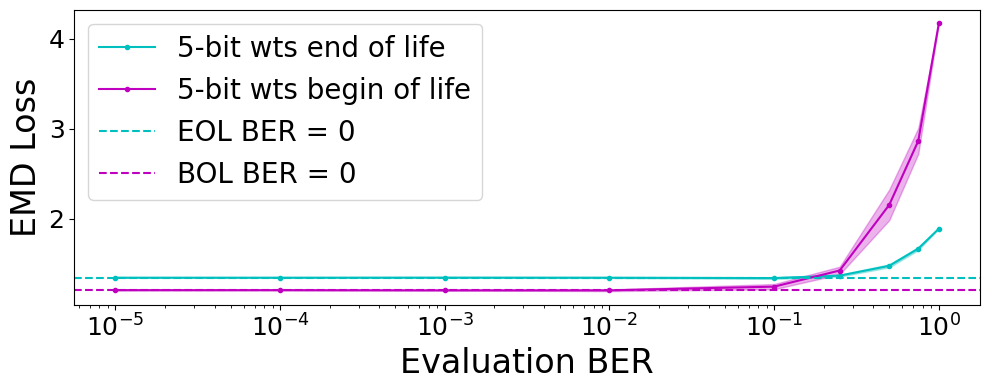

In [26]:
"""
Line graphs
"""

"""
Autoencoder Model info:
2,144 weights
6-bit weights
10,720 weight bits
"""

eval_bers = [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.5, 0.75, 1]

quantized_eol_emd = [1.346, 1.346, 1.346, 1.347, 1.346, 1.342, 1.369, 1.478, 1.669, 1.890]
quantized_eol_emd_stddev = [0, 0, 0, 0.001, 0.003, 0.009, 0.011, 0.017, 0.017, 0]
quantized_bol_emd = [1.208, 1.208, 1.208, 1.206, 1.206, 1.247, 1.426, 2.155, 2.864, 4.169]
quantized_bol_emd_stddev = [0, 0, 0, 0.001, 0.009, 0.029, 0.042, 0.170, 0.143, 0]


dims=(10, 4)
fig, ax = plt.subplots(figsize=dims)
ax.tick_params(axis='both', which='major', labelsize=18)
# ax.set_xticks(np.arange(len(eval_bers)))
# ax.set_xticklabels(eval_bers, fontsize=20)
ax.set_ylabel('EMD Loss', fontsize=24)
ax.set_xlabel('Evaluation BER', fontsize=24)

ax.plot(eval_bers[1:], quantized_eol_emd[1:], '-c.', label='5-bit wts end of life')
ax.plot(eval_bers[1:], quantized_bol_emd[1:], '-m.', label='5-bit wts begin of life')
ax.fill_between(
    eval_bers[1:], 
    np.array(quantized_eol_emd[1:]) - np.array(quantized_eol_emd_stddev[1:]), 
    np.array(quantized_eol_emd[1:]) + np.array(quantized_eol_emd_stddev[1:]), 
    color='c', 
    alpha=0.3
)
ax.fill_between(
    eval_bers[1:], 
    np.array(quantized_bol_emd[1:]) - np.array(quantized_bol_emd_stddev[1:]), 
    np.array(quantized_bol_emd[1:]) + np.array(quantized_bol_emd_stddev[1:]), 
    color='m', 
    alpha=0.3
)

plt.axhline(y=quantized_eol_emd[0], color='c', linestyle='--', label='EOL BER = 0')
plt.axhline(y=quantized_bol_emd[0], color='m', linestyle='--', label='BOL BER = 0')

ax.legend(loc='best', prop={'size': 20})
ax.set_xscale('log')

fig.tight_layout()


plt.savefig('autoencoder-eval-ber-log.pdf')

In [55]:
5 * 2144

10720

In [58]:
NUM_WEIGHT_BITS = 5
# Total num in the model
TOTAL_NUM_WEIGHTS = 2144
TOTAL_NUM_WEIGHT_BITS = NUM_WEIGHT_BITS * TOTAL_NUM_WEIGHTS # 10,720 weight bits

print(f'TOTAL_NUM_WEIGHT_BITS = {TOTAL_NUM_WEIGHT_BITS}')

NUM_CONV_WEIGHTS = 80
NUM_CONV_BITS = NUM_CONV_WEIGHTS * NUM_WEIGHT_BITS
NUM_DENSE_WEIGHTS = 2064
NUM_DENSE_BITS = NUM_DENSE_WEIGHTS * NUM_WEIGHT_BITS

model_bers = []
model_bits_flipped = []
for ber in eval_bers: # eval bers are on the layer level
    conv_bits_flipped = int(ber * NUM_CONV_BITS)
    dense_bits_flipped = int(ber * NUM_DENSE_BITS)
    total_bits_flipped = conv_bits_flipped + dense_bits_flipped
    model_ber = total_bits_flipped / TOTAL_NUM_WEIGHT_BITS
    model_bers.append(model_ber)
    model_bits_flipped.append(total_bits_flipped)
    print(f'For layer BER {ber}, flipping {total_bits_flipped} bits at model BER = {model_ber:.7f}')
    print(f'\t Conv bits flipped = {conv_bits_flipped}')
    print(f'\t Dense bits flipped = {dense_bits_flipped}')
    print()
    
# Conclusion: Layer BER == Model BER when Layer BER is the same across all layers

TOTAL_NUM_WEIGHT_BITS = 10720
For layer BER 0, flipping 0 bits at model BER = 0.0000000
	 Conv bits flipped = 0
	 Dense bits flipped = 0

For layer BER 1e-05, flipping 0 bits at model BER = 0.0000000
	 Conv bits flipped = 0
	 Dense bits flipped = 0

For layer BER 0.0001, flipping 1 bits at model BER = 0.0000933
	 Conv bits flipped = 0
	 Dense bits flipped = 1

For layer BER 0.001, flipping 10 bits at model BER = 0.0009328
	 Conv bits flipped = 0
	 Dense bits flipped = 10

For layer BER 0.01, flipping 107 bits at model BER = 0.0099813
	 Conv bits flipped = 4
	 Dense bits flipped = 103

For layer BER 0.1, flipping 1072 bits at model BER = 0.1000000
	 Conv bits flipped = 40
	 Dense bits flipped = 1032

For layer BER 0.25, flipping 2680 bits at model BER = 0.2500000
	 Conv bits flipped = 100
	 Dense bits flipped = 2580

For layer BER 0.5, flipping 5360 bits at model BER = 0.5000000
	 Conv bits flipped = 200
	 Dense bits flipped = 5160

For layer BER 0.75, flipping 8040 bits at model BER = 

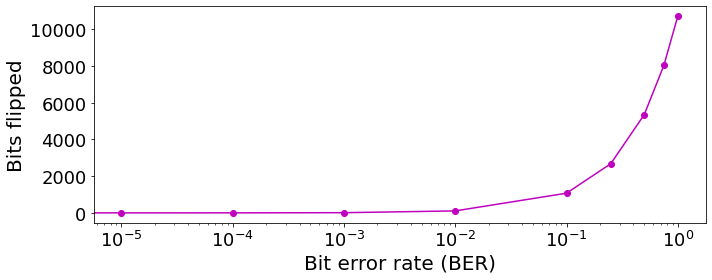

In [62]:
dims=(10,4)
fig, ax = plt.subplots(figsize=dims)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xticks(np.arange(len(eval_bers)))
ax.set_xticklabels(eval_bers, fontsize=18)
ax.set_ylabel('Bits flipped', fontsize=20)
ax.set_xlabel('Bit error rate (BER)', fontsize=20)

ax.plot(eval_bers, model_bits_flipped, '-mo')
ax.set_xscale('log')

fig.tight_layout()

plt.savefig('quantized-autoencoder-bits-flipped.pdf')